In [110]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [112]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [113]:
df.duplicated().sum()

126

In [114]:
df.drop_duplicates(inplace=True)

In [115]:
df.duplicated().sum()

0

property type

<Axes: xlabel='property_type'>

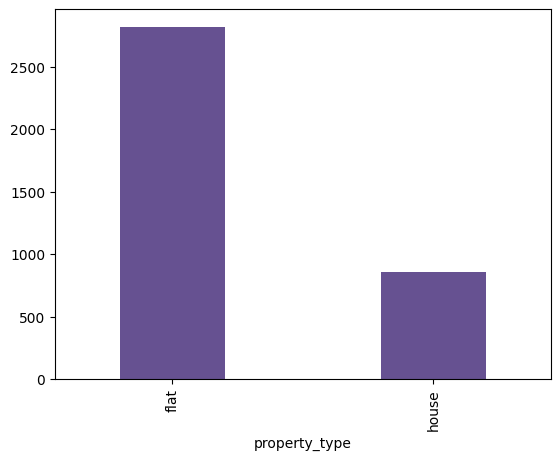

In [116]:
df['property_type'].value_counts().plot(kind='bar',color='#665191',width=0.4)

Observations
- Flats are in majority (75%) and there are less number of houses(25%)
- No missing values

Society

In [117]:
df['society'].value_counts().shape

(676,)

In [118]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [119]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [120]:
society_counts = df['society'].value_counts()

# frequency distribution for societies
frequency_bins = {
    'Very high (>100)':(society_counts > 100).sum(),
    'High (50-100)':((society_counts >= 50) & (society_counts <=100)).sum(),
    'Average (10-49)':((society_counts >=10) & (society_counts < 50)).sum(),
    'Low (2-9)':((society_counts > 1) & (society_counts < 10)).sum(),
    'Very Low (1)':(society_counts == 1).sum()
}
frequency_bins

{'Very high (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

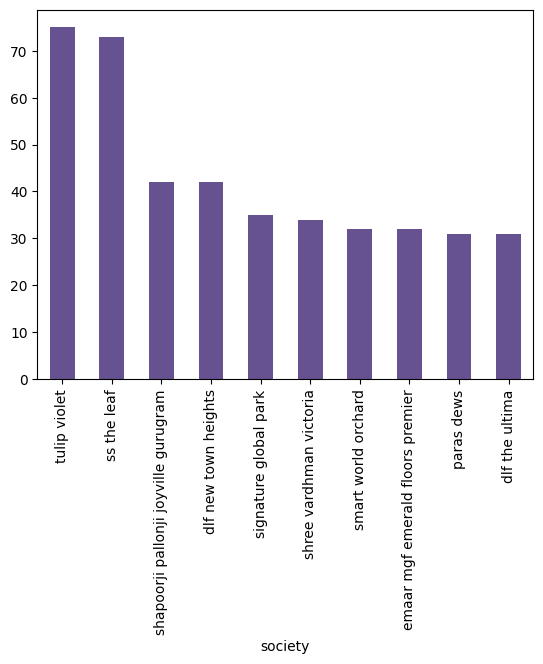

In [121]:
# top 10 societies
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar',color='#665191')

In [122]:
df['society'].isnull().sum()

1

In [123]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


Observation
- Aound 13% properties comes under independent tag
- There are 675 societies
- The top 75 societies have 50 percent of the properties and the 50 percent of the properties comes under the remaining 600 socities
    - Very High (>100) only one society has more than 100 listing 
    - High (50-100) 2 societies have between 50 to 100 listings 
    - Average (10-49) 92 socities fall in the range of 10 to 49 listings each
    - Low (2-9) 273 socities have between 2 to 9 listings
    - Very Low (1) A significant number 308 socities have only 1 listings
   
- 1 Missing value   

Sector -> categorical column

In [124]:
# unique sector 
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

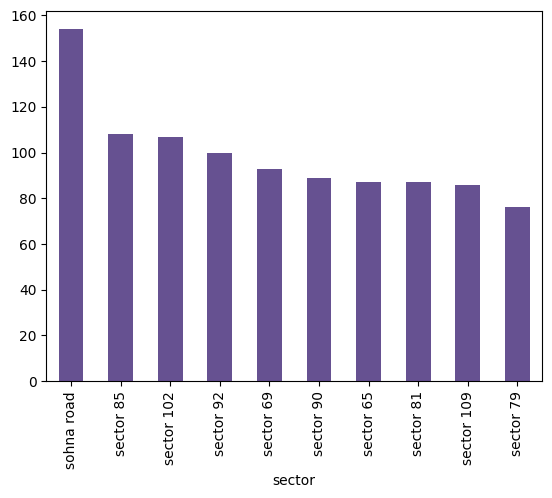

In [125]:
# top 10 sectors 
df['sector'].value_counts().head(10).plot(kind='bar',color='#665191')

In [126]:
# frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    
    'Very high (>100)':(sector_counts > 100).sum(),
    'High (50-100)':((sector_counts >= 50) & (sector_counts <=100)).sum(),
    'Average (10-49)':((sector_counts >=10) & (sector_counts < 50)).sum(),
    'Low (2-9)':((sector_counts > 1) & (sector_counts < 10)).sum(),
    'Very Low (1)':(sector_counts == 1).sum()
    
}
sector_frequency_bins

{'Very high (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

In [127]:
df['price'].isnull().sum()

17

In [128]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

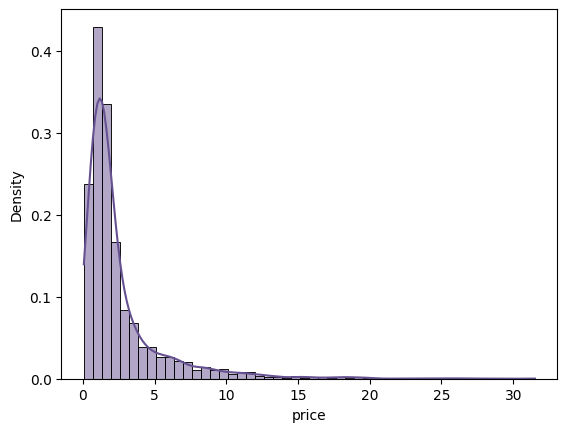

In [129]:
sns.histplot(df['price'],kde=True,bins=50,stat='density',color='#665191')

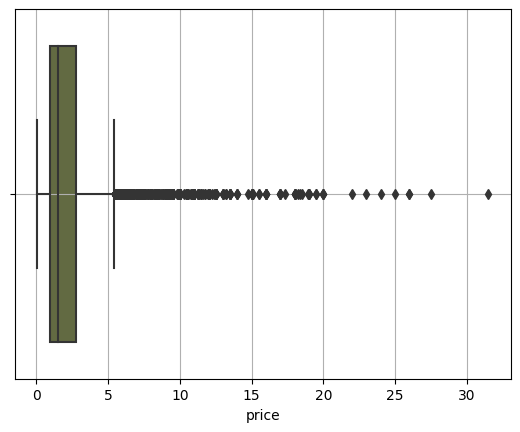

In [130]:
sns.boxplot(x=df['price'],color='#66713B')
plt.grid()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
    
- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.

    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

    - Missing Values: There are 17 missing values in the price column.

In [131]:
# skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [132]:
# Quantile analysis

quantiles = df['price'].quantile([0.01,0.05,0.95,0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [133]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [134]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [135]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [136]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

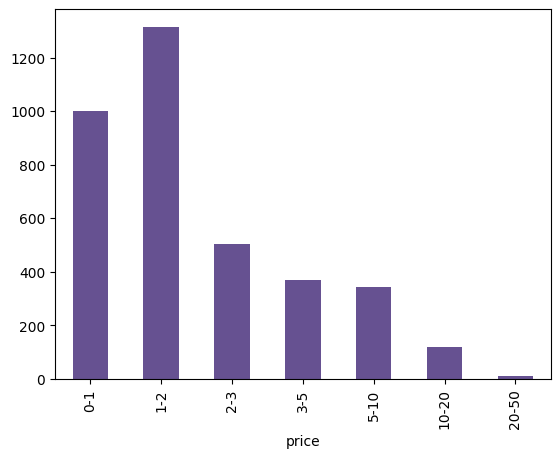

In [137]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar',color='#665191')

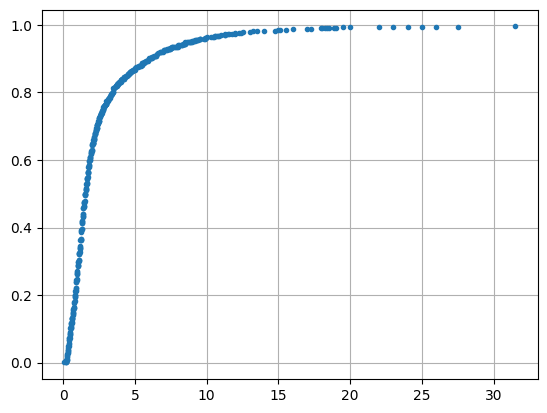

In [138]:
# ecdf plot 
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index,ecdf,marker='.',linestyle='none')
plt.grid()

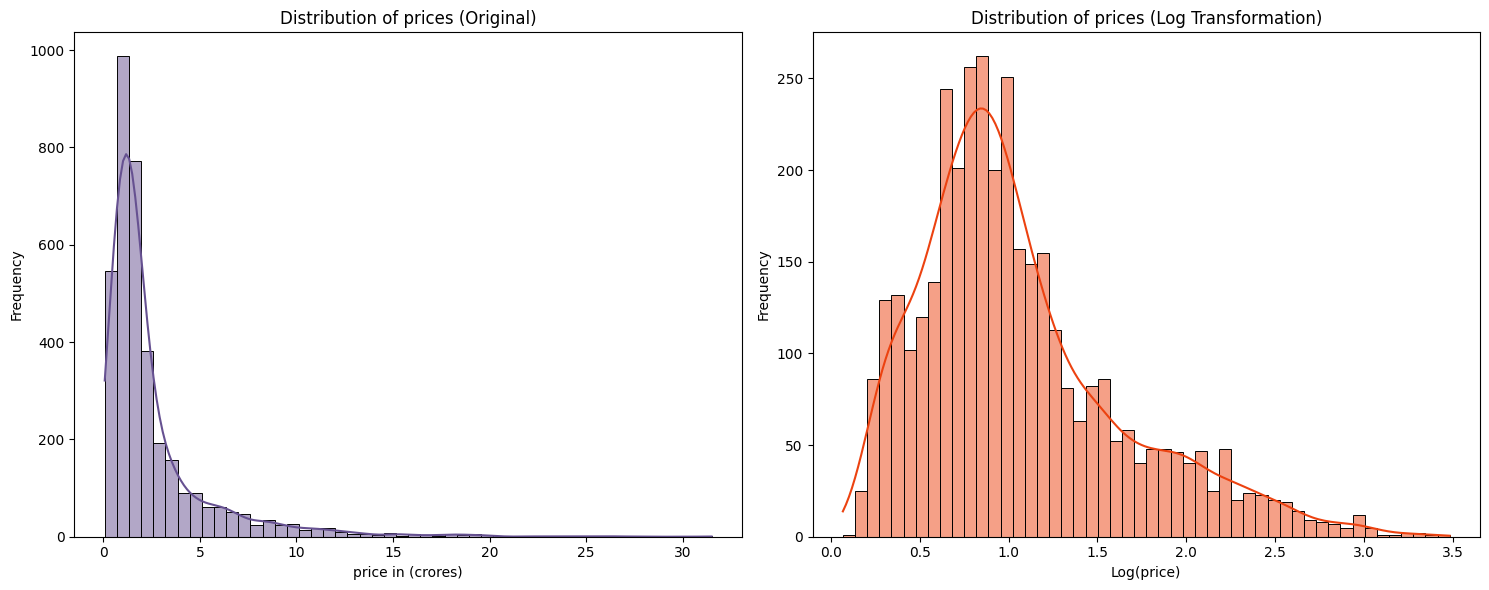

In [139]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,bins=50,color='#665191')
plt.title('Distribution of prices (Original)')
plt.xlabel('price in (crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde=True,bins=50,color='#ec4210')
plt.title('Distribution of prices (Log Transformation)')
plt.xlabel('Log(price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [140]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


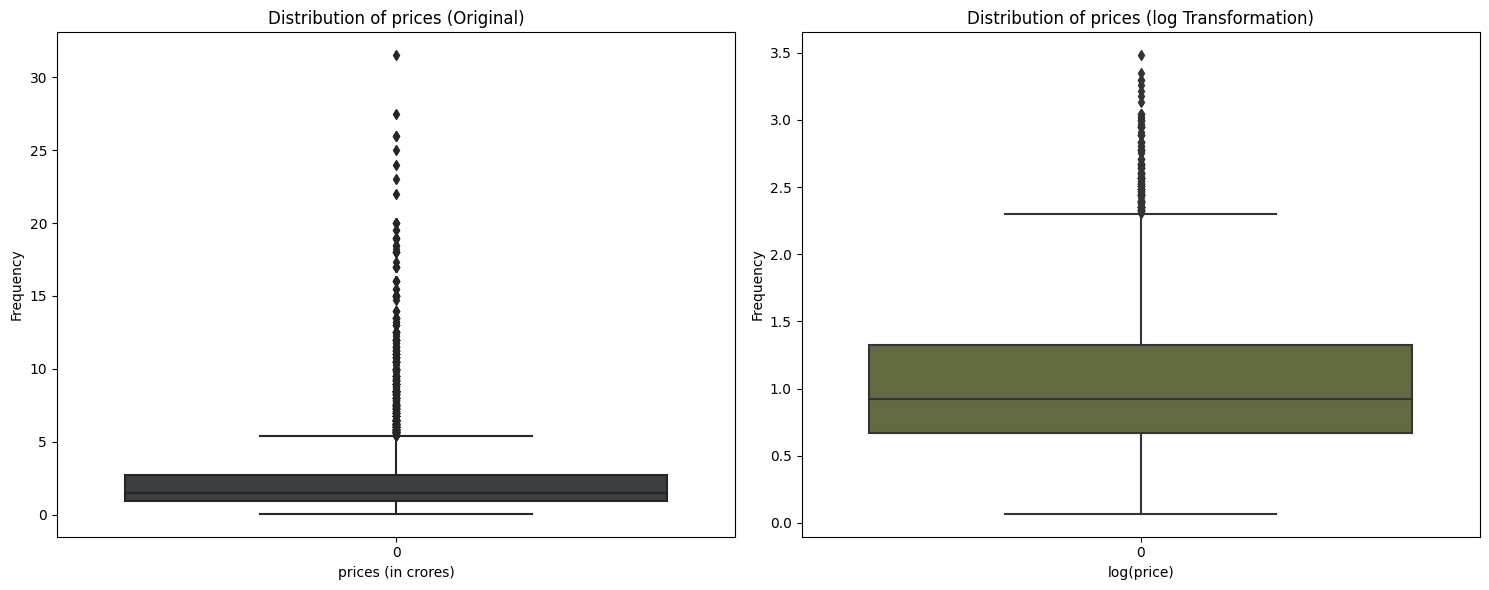

In [141]:
plt.figure(figsize=(15,6))
pb_color = ['#3A3E43','#66713B']

# Distribution plot without log transformation 
plt.subplot(1,2,1)
sns.boxplot(df['price'],color='#3A3E43')
plt.title('Distribution of prices (Original)')
plt.xlabel('prices (in crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation 
plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']),color='#66713B')
plt.title('Distribution of prices (log Transformation)')
plt.xlabel('log(price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Price per sqft 

In [142]:
df['price_per_sqft'].isnull().sum()

17

In [143]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

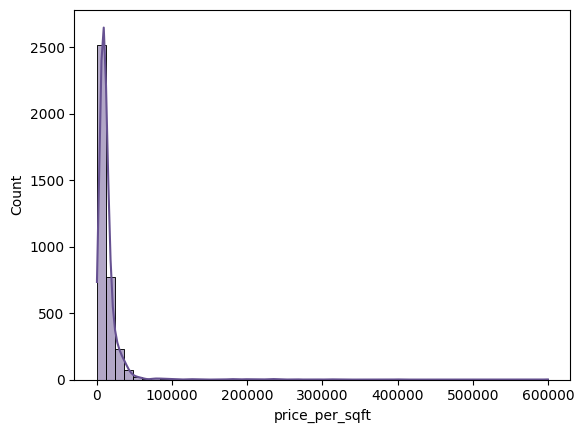

In [144]:
sns.histplot(df['price_per_sqft'],kde=True,bins=50,color='#665191')

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

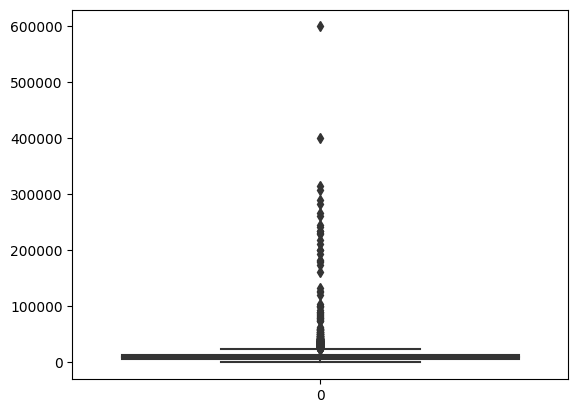

In [145]:
sns.boxplot(df['price_per_sqft'],color='#66713B')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

Observations

- Potential Outliers
- Right Skewed
- 17 missing values

In [146]:
# skewness and kurtosis
skewness = df['price_per_sqft'].skew()
kurtosis = df['price_per_sqft'].kurt()

print(skewness,kurtosis)

11.4371904262371 186.9280132353288


Bedroom

In [147]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

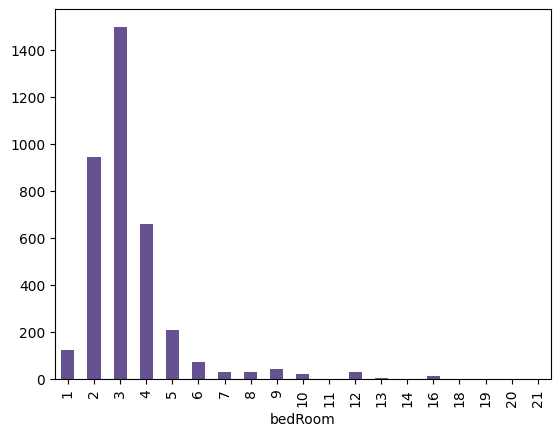

In [148]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar',color='#665191')

<Axes: ylabel='proportion'>

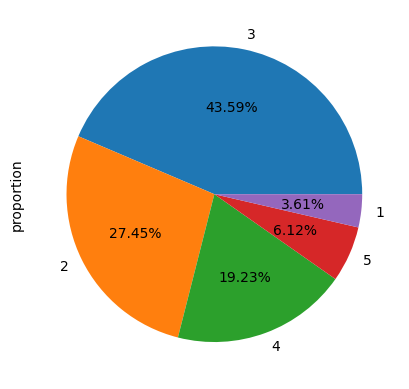

In [149]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

bathroom

In [150]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

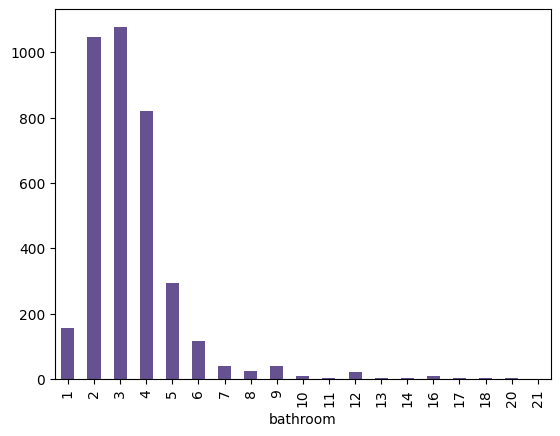

In [151]:
df['bathroom'].value_counts().sort_index().plot(kind='bar',color='#665191')

<Axes: ylabel='count'>

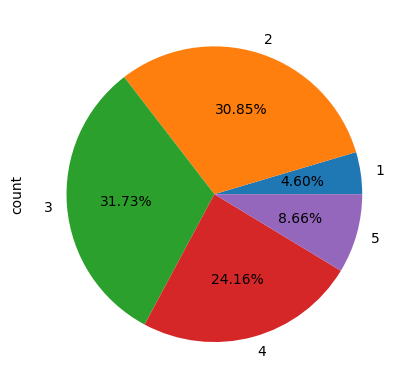

In [152]:
df['bathroom'].value_counts().sort_index().head().plot(kind='pie',autopct='%0.2f%%')

balcony

In [153]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

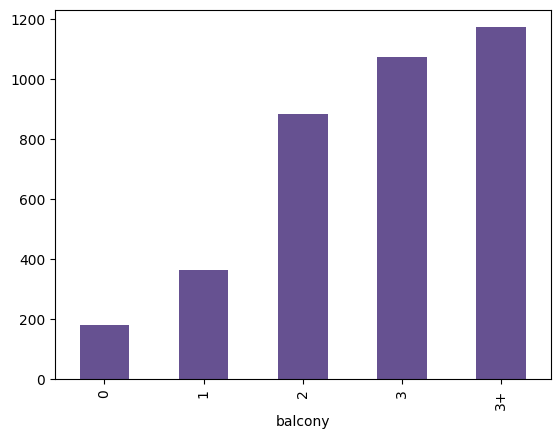

In [154]:
df['balcony'].value_counts().sort_index().plot(kind='bar',color='#665191')

<Axes: ylabel='count'>

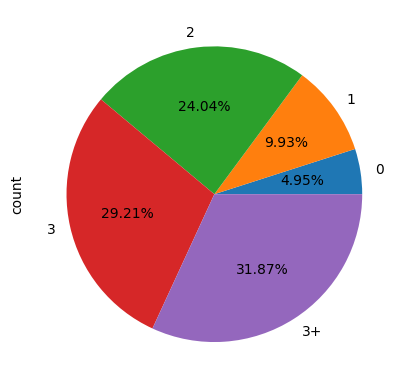

In [155]:
df['balcony'].value_counts().sort_index().plot(kind='pie',autopct='%0.2f%%')

floorNum

In [156]:
df['floorNum'].isnull().sum()

19

In [157]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

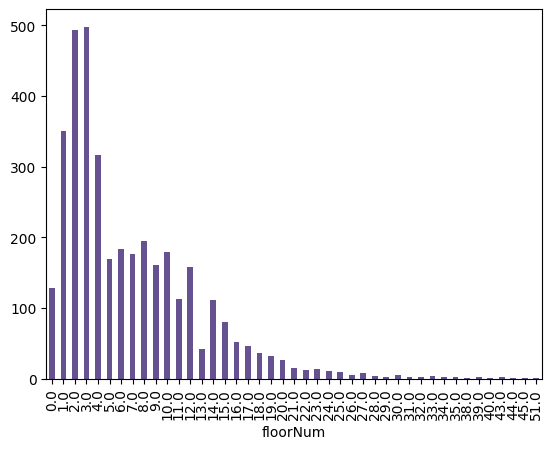

In [158]:
df['floorNum'].value_counts().sort_index().plot(kind='bar',color='#665191')

<Axes: >

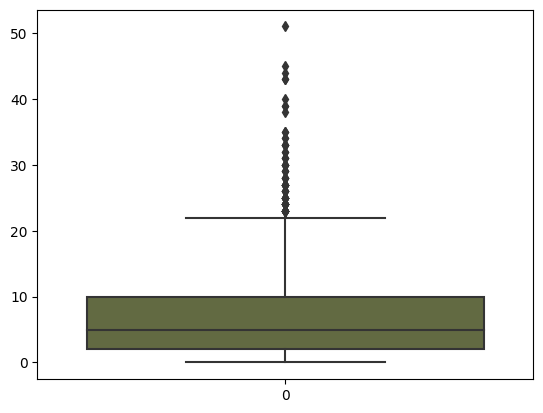

In [159]:
sns.boxplot(df['floorNum'],color='#66713B')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

facing

In [160]:
df['facing'].isnull().sum()

1045

In [161]:
df['facing'].fillna('NA',inplace=True)

In [162]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

agePossession

In [163]:
df['agePossession'].isnull().sum()

0

In [164]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

areas

In [165]:
# super built up area 
df['super_built_up_area'].isnull().sum()

1802

In [166]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

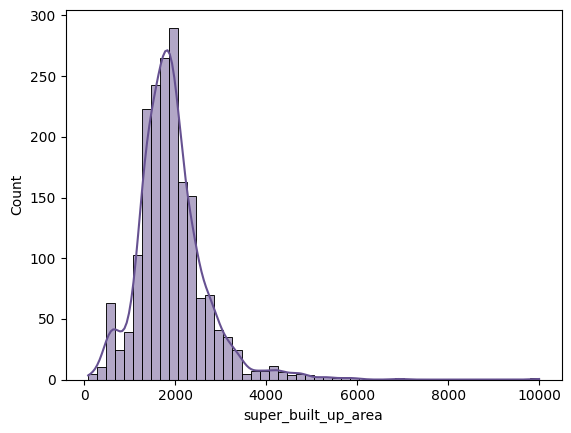

In [167]:
sns.histplot(df['super_built_up_area'].dropna(),color='#665191',bins=50,kde=True)

<Axes: >

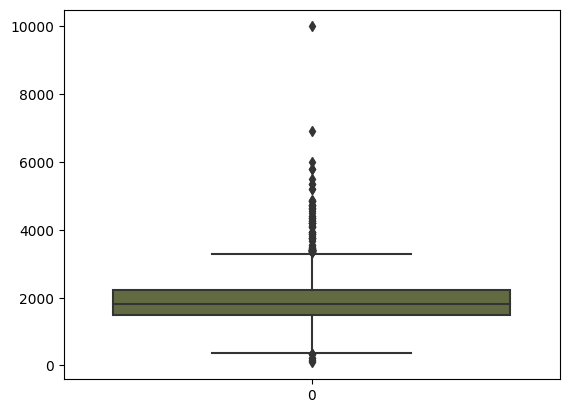

In [168]:
sns.boxplot(df['super_built_up_area'].dropna(),color='#66713B')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [169]:
# built up area
df['built_up_area'].isnull().sum()

1987

In [170]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

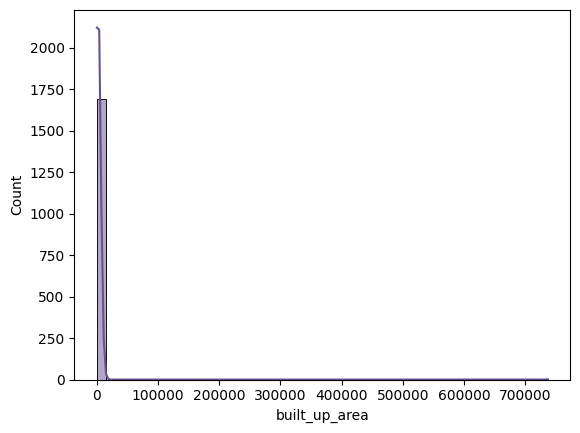

In [171]:
sns.histplot(df['built_up_area'].dropna(),bins=50,color='#665191',kde=True)

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [174]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [175]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

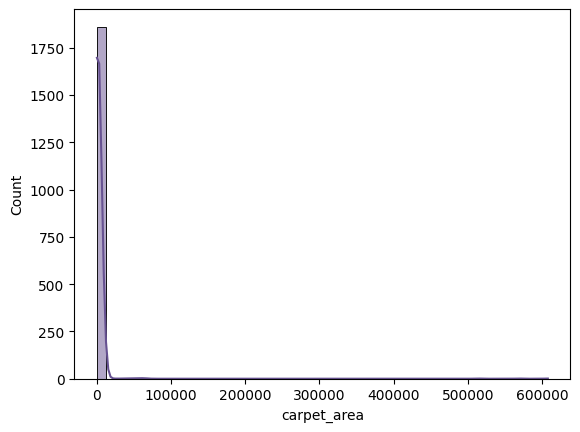

In [176]:
sns.histplot(df['carpet_area'].dropna(),bins=50,kde=True,color='#665191')

<Axes: >

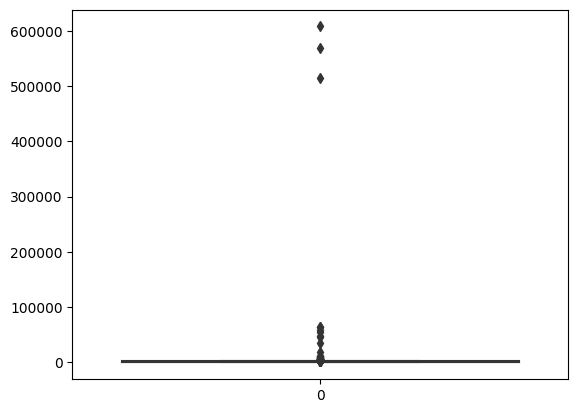

In [177]:
sns.boxplot(df['carpet_area'],color='#66713B')

additional rooms

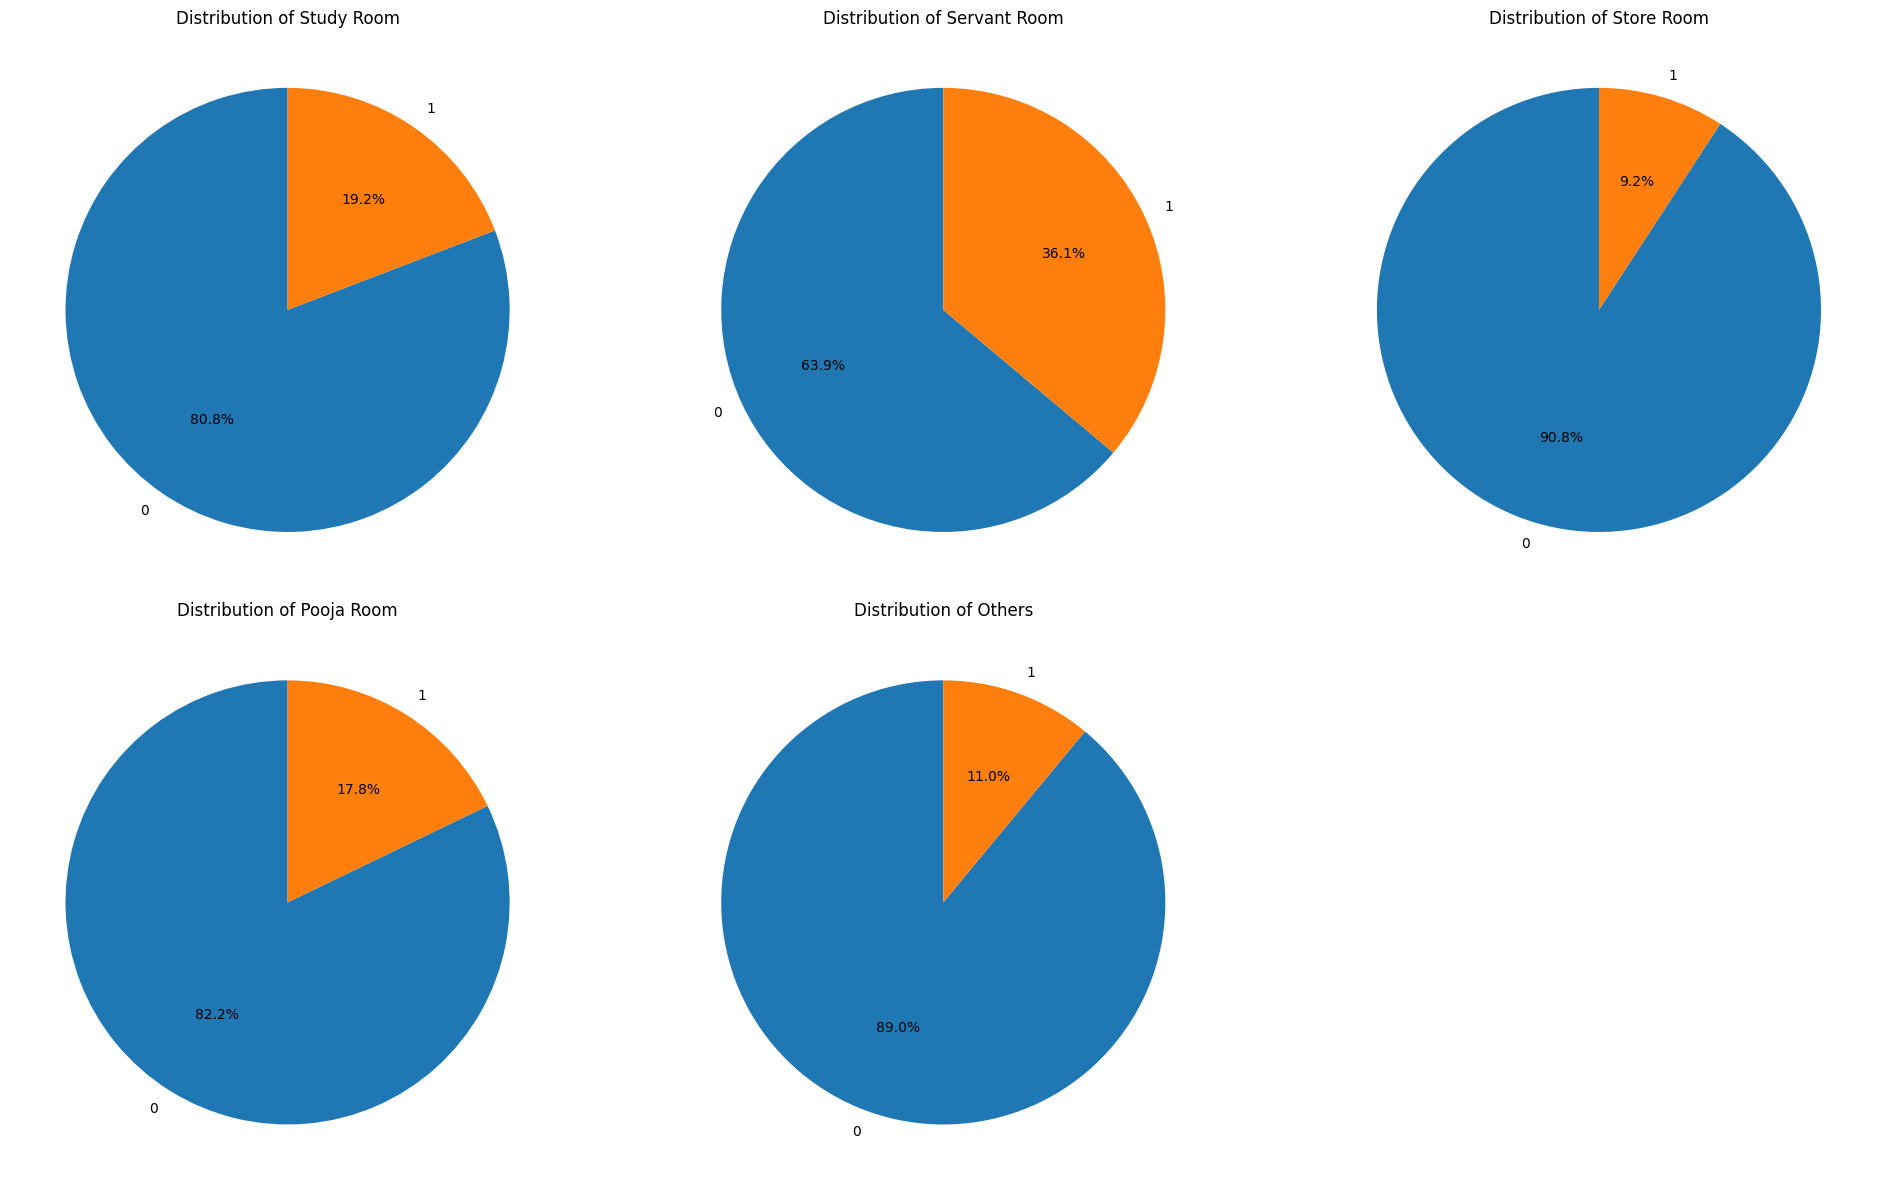

In [179]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Furnishing_type

In [180]:
df['furnishing_type'].value_counts()

furnishing_type
0    2411
1    1059
2     207
Name: count, dtype: int64

<Axes: ylabel='count'>

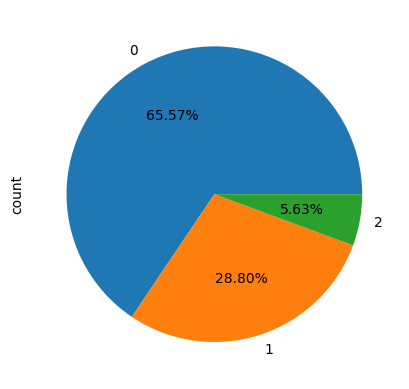

In [181]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

Luxury score

In [182]:
df['luxury_score'].isnull().sum()

0

In [183]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

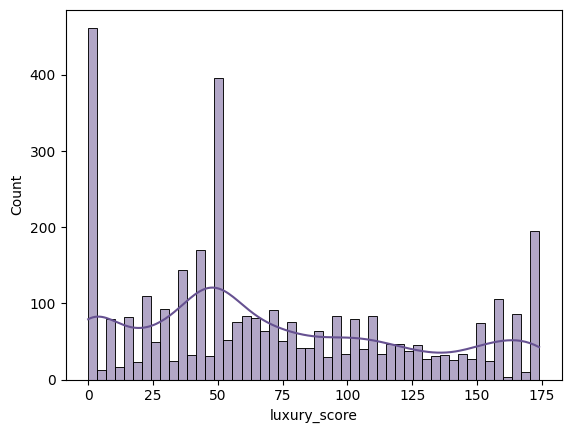

In [184]:
sns.histplot(df['luxury_score'],kde=True,bins=50,color='#665191')

<Axes: >

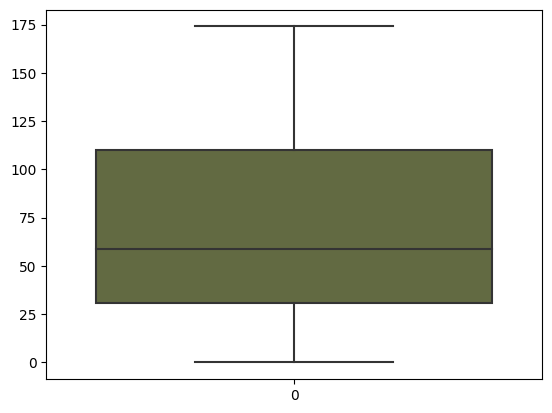

In [185]:
sns.boxplot(df['luxury_score'],color='#66713B')